In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 33.4 MB/s eta 0:00:00


<Axes: title={'center': '한글'}>

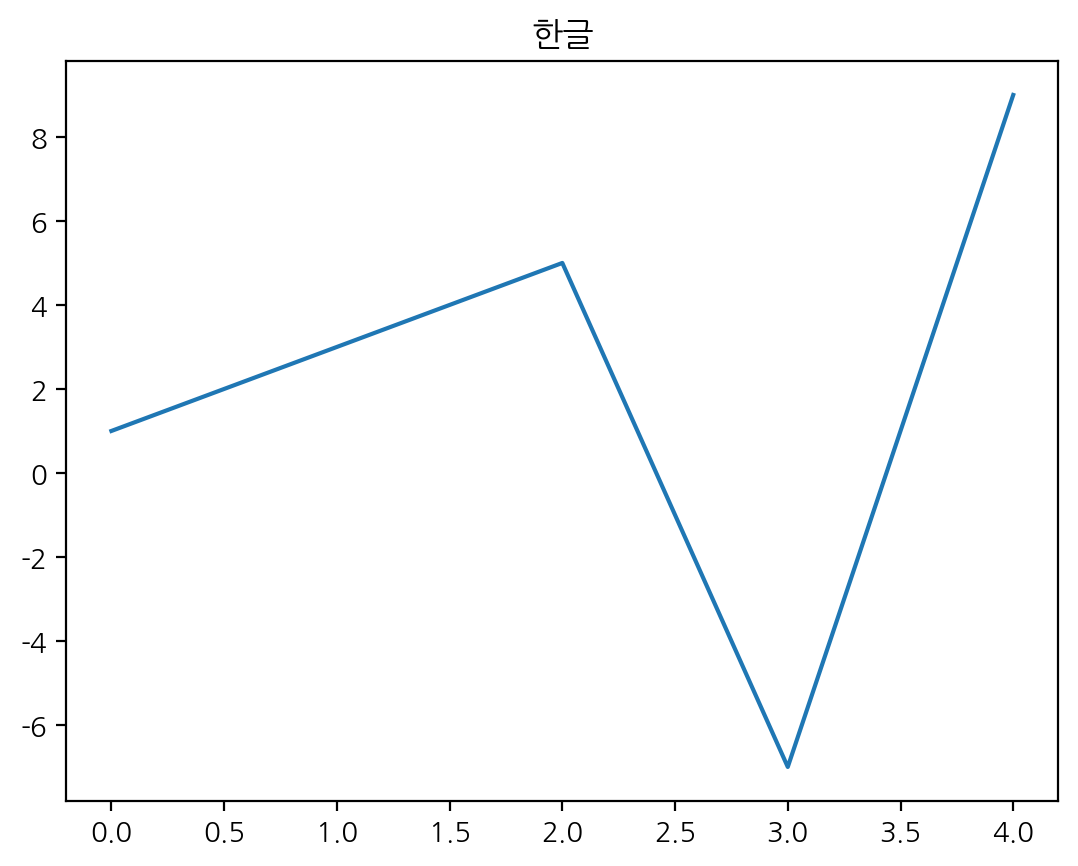

In [3]:
import koreanize_matplotlib
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

In [4]:
%cd /content/drive/MyDrive/최종프로젝트

/content/drive/MyDrive/최종프로젝트


In [5]:
path = './data/서울시_토지특성정보.csv'

raw = pd.read_csv(path, encoding='cp949')
df = raw.copy()
df.head(3)

<ipython-input-5-85ffe17c7f81>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(path, encoding='cp949')


,고유번호,법정동코드,법정동명,대장구분코드,대장구분명,지번,토지일련번호,기준연도,기준월,지목코드,...,토지이용상황코드,토지이용상황,지형높이코드,지형높이,지형형상코드,지형형상,도로접면코드,도로접면,공시지가,데이터기준일자
0,1111010100100010000,1111010100,서울특별시 종로구 청운동,1,일반,1,1,2023,1,8,...,140,아파트,3,완경사,4,사다리형,6,소로한면,5320000,2024-01-23
1,1111010100100010001,1111010100,서울특별시 종로구 청운동,1,일반,1-1,2,2023,1,14,...,910,도로등,0,지정되지않음,0,지정되지않음,0,지정되지않음,1567000,2024-01-23
2,1111010100100010002,1111010100,서울특별시 종로구 청운동,1,일반,1-2,3,2023,1,8,...,150,주거나지,4,급경사,5,부정형,12,맹지,2355000,2024-01-23


In [6]:
df.shape

(899756, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899756 entries, 0 to 899755
Data columns (total 26 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   고유번호      899756 non-null  object 
 1   법정동코드     899756 non-null  int64  
 2   법정동명      899756 non-null  object 
 3   대장구분코드    899756 non-null  int64  
 4   대장구분명     899756 non-null  object 
 5   지번        899551 non-null  object 
 6   토지일련번호    899756 non-null  int64  
 7   기준연도      899756 non-null  int64  
 8   기준월       899756 non-null  int64  
 9   지목코드      899756 non-null  int64  
 10  지목명       899756 non-null  object 
 11  토지면적      899756 non-null  float64
 12  용도지역코드1   899756 non-null  int64  
 13  용도지역명1    899756 non-null  object 
 14  용도지역코드2   899756 non-null  int64  
 15  용도지역명2    899756 non-null  object 
 16  토지이용상황코드  899756 non-null  int64  
 17  토지이용상황    899756 non-null  object 
 18  지형높이코드    899756 non-null  int64  
 19  지형높이      899756 non-null  object 
 20  지형형상

In [8]:
df.isnull().sum()

고유번호          0
법정동코드         0
법정동명          0
대장구분코드        0
대장구분명         0
지번          205
토지일련번호        0
기준연도          0
기준월           0
지목코드          0
지목명           0
토지면적          0
용도지역코드1       0
용도지역명1        0
용도지역코드2       0
용도지역명2        0
토지이용상황코드      0
토지이용상황        0
지형높이코드        0
지형높이          0
지형형상코드        0
지형형상          0
도로접면코드        0
도로접면          0
공시지가          0
데이터기준일자       0
dtype: int64

In [9]:
df.describe()

,법정동코드,대장구분코드,토지일련번호,기준연도,기준월,지목코드,토지면적,용도지역코드1,용도지역코드2,토지이용상황코드,지형높이코드,지형형상코드,도로접면코드,공시지가
count,8.997560e+05,899756.000000,899756.000000,899756.0,899756.000000,899756.000000,8.997560e+05,899756.000000,899756.000000,899756.000000,899756.000000,899756.000000,899756.000000,8.997560e+05
mean,1.140645e+09,1.026267,52205.724356,2023.0,1.012830,9.279916,6.715065e+02,16.971194,0.880559,358.164238,1.919151,2.872201,6.059135,4.657130e+06
std,1.865747e+07,0.242399,179397.728704,0.0,0.277158,3.583382,1.192145e+04,7.701583,4.163341,321.836145,0.974684,1.768986,3.561032,5.049980e+06
min,1.111010e+09,1.000000,1.000000,2023.0,1.000000,1.000000,1.000000e-01,11.000000,0.000000,110.000000,0.000000,0.000000,0.000000,4.520000e+03
25%,1.123011e+09,1.000000,8887.000000,2023.0,1.000000,8.000000,7.600000e+01,14.000000,0.000000,110.000000,2.000000,1.000000,3.000000,2.365000e+06
50%,1.141010e+09,1.000000,17899.000000,2023.0,1.000000,8.000000,1.414000e+02,14.000000,0.000000,210.000000,2.000000,3.000000,8.000000,3.589000e+06
75%,1.156013e+09,1.000000,28382.000000,2023.0,1.000000,8.000000,2.420000e+02,15.000000,0.000000,610.000000,2.000000,4.000000,8.000000,5.394000e+06
max,1.174011e+09,9.000000,999999.000000,2023.0,7.000000,28.000000,4.416995e+06,44.000000,44.000000,990.000000,5.000000,6.000000,12.000000,1.741000e+08


In [10]:
df.columns

Index(['고유번호', '법정동코드', '법정동명', '대장구분코드', '대장구분명', '지번', '토지일련번호', '기준연도',
       '기준월', '지목코드', '지목명', '토지면적', '용도지역코드1', '용도지역명1', '용도지역코드2', '용도지역명2',
       '토지이용상황코드', '토지이용상황', '지형높이코드', '지형높이', '지형형상코드', '지형형상', '도로접면코드',
       '도로접면', '공시지가', '데이터기준일자'],
      dtype='object')

In [11]:
df.head(3)

,고유번호,법정동코드,법정동명,대장구분코드,대장구분명,지번,토지일련번호,기준연도,기준월,지목코드,...,토지이용상황코드,토지이용상황,지형높이코드,지형높이,지형형상코드,지형형상,도로접면코드,도로접면,공시지가,데이터기준일자
0,1111010100100010000,1111010100,서울특별시 종로구 청운동,1,일반,1,1,2023,1,8,...,140,아파트,3,완경사,4,사다리형,6,소로한면,5320000,2024-01-23
1,1111010100100010001,1111010100,서울특별시 종로구 청운동,1,일반,1-1,2,2023,1,14,...,910,도로등,0,지정되지않음,0,지정되지않음,0,지정되지않음,1567000,2024-01-23
2,1111010100100010002,1111010100,서울특별시 종로구 청운동,1,일반,1-2,3,2023,1,8,...,150,주거나지,4,급경사,5,부정형,12,맹지,2355000,2024-01-23


In [12]:
temp = df[['법정동명','지번','기준연도','기준월','지형높이코드', '지형높이','공시지가', '데이터기준일자']]

In [13]:
temp[:3]

,법정동명,지번,기준연도,기준월,지형높이코드,지형높이,공시지가,데이터기준일자
0,서울특별시 종로구 청운동,1,2023,1,3,완경사,5320000,2024-01-23
1,서울특별시 종로구 청운동,1-1,2023,1,0,지정되지않음,1567000,2024-01-23
2,서울특별시 종로구 청운동,1-2,2023,1,4,급경사,2355000,2024-01-23


In [14]:
temp.tail(3)

,법정동명,지번,기준연도,기준월,지형높이코드,지형높이,공시지가,데이터기준일자
899753,서울특별시 강동구 천호동,244-5,2023,7,2,평지,6992000,2024-01-23
899754,서울특별시 강동구 천호동,578,2023,7,2,평지,8564000,2024-01-23
899755,서울특별시 강동구 천호동,578-1,2023,7,0,지정되지않음,2444000,2024-01-23


In [15]:
temp['기준월'].value_counts()

기준월
1    897832
7      1924
Name: count, dtype: int64

In [16]:
temp['기준연도'].value_counts()

기준연도
2023    899756
Name: count, dtype: int64

In [17]:
temp['기준연도']

0         2023
1         2023
2         2023
3         2023
4         2023
          ... 
899751    2023
899752    2023
899753    2023
899754    2023
899755    2023
Name: 기준연도, Length: 899756, dtype: int64

In [18]:
temp['기준연도'] = temp['기준연도'].astype(str) + '-' + temp['기준월'].astype(str).str.zfill(2)

<ipython-input-18-0f9c8a6886bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['기준연도'] = temp['기준연도'].astype(str) + '-' + temp['기준월'].astype(str).str.zfill(2)


In [19]:
temp[:3]

,법정동명,지번,기준연도,기준월,지형높이코드,지형높이,공시지가,데이터기준일자
0,서울특별시 종로구 청운동,1,2023-01,1,3,완경사,5320000,2024-01-23
1,서울특별시 종로구 청운동,1-1,2023-01,1,0,지정되지않음,1567000,2024-01-23
2,서울특별시 종로구 청운동,1-2,2023-01,1,4,급경사,2355000,2024-01-23


In [20]:
temp.rename(columns={'기준연도':'기준년월'}, inplace=True)

<ipython-input-20-0bc0ee1377fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.rename(columns={'기준연도':'기준년월'}, inplace=True)


In [21]:
temp.drop(columns='기준월', inplace=True)

<ipython-input-21-1cd89f0368a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop(columns='기준월', inplace=True)


In [22]:
temp[:3]

,법정동명,지번,기준년월,지형높이코드,지형높이,공시지가,데이터기준일자
0,서울특별시 종로구 청운동,1,2023-01,3,완경사,5320000,2024-01-23
1,서울특별시 종로구 청운동,1-1,2023-01,0,지정되지않음,1567000,2024-01-23
2,서울특별시 종로구 청운동,1-2,2023-01,4,급경사,2355000,2024-01-23


In [23]:
temp['구단위'] = temp['법정동명'].str.extract(r'\s(\w+구)\s')

<ipython-input-23-108a0fa061a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['구단위'] = temp['법정동명'].str.extract(r'\s(\w+구)\s')


In [24]:
temp[:3]

,법정동명,지번,기준년월,지형높이코드,지형높이,공시지가,데이터기준일자,구단위
0,서울특별시 종로구 청운동,1,2023-01,3,완경사,5320000,2024-01-23,종로구
1,서울특별시 종로구 청운동,1-1,2023-01,0,지정되지않음,1567000,2024-01-23,종로구
2,서울특별시 종로구 청운동,1-2,2023-01,4,급경사,2355000,2024-01-23,종로구


In [25]:
temp['지형높이'].value_counts()

지형높이
평지        576427
완경사       154077
지정되지않음    141551
급경사        18430
고지          7173
저지          2098
Name: count, dtype: int64

In [26]:
len(temp['구단위'].unique())

25

In [29]:
temp.groupby('구단위')['지형높이'].apply(lambda x: x[~x.isin(['평지','지정되지않음','저지','완경사'])].max())

구단위
강남구     급경사
강동구     급경사
강북구     급경사
강서구     급경사
관악구     급경사
광진구     급경사
구로구     급경사
금천구     급경사
노원구     급경사
도봉구     급경사
동대문구    급경사
동작구     급경사
마포구     급경사
서대문구    급경사
서초구     급경사
성동구     급경사
성북구     급경사
송파구     급경사
양천구     급경사
영등포구    급경사
용산구     급경사
은평구     급경사
종로구     급경사
중구      급경사
중랑구     급경사
Name: 지형높이, dtype: object

<Axes: >

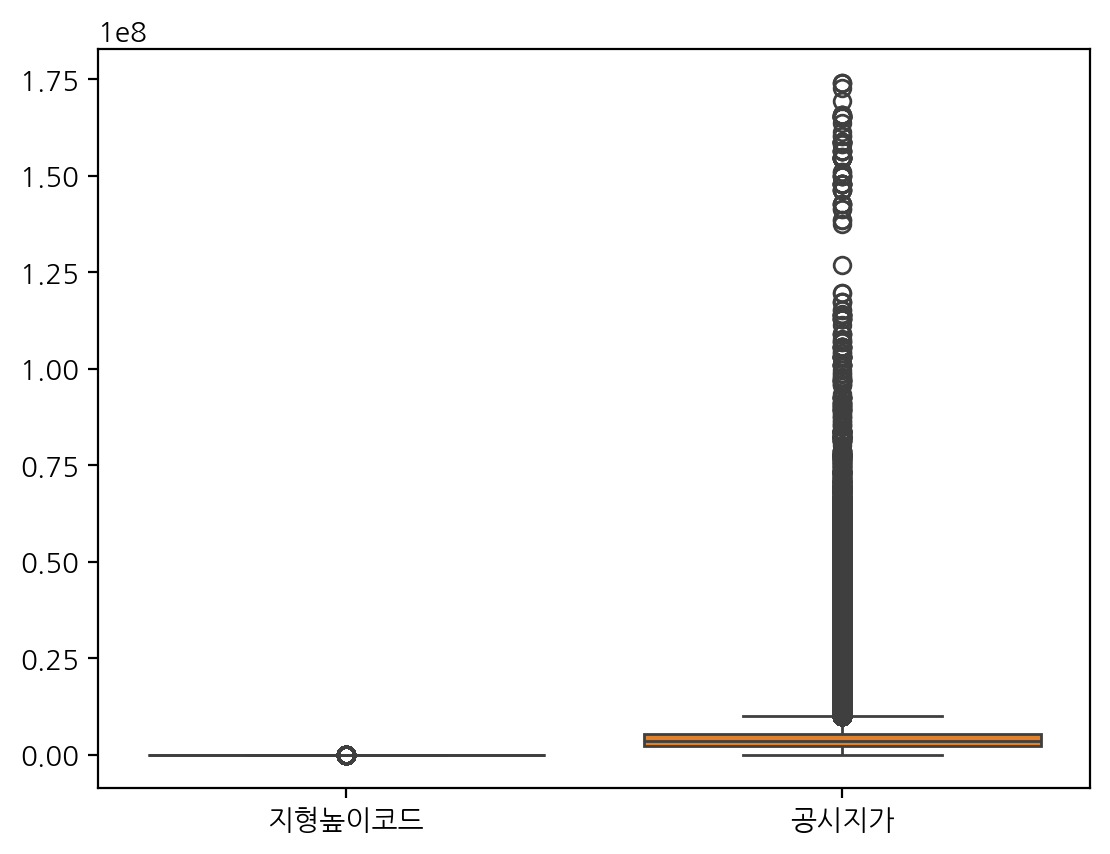

In [34]:
sns.boxplot(temp)

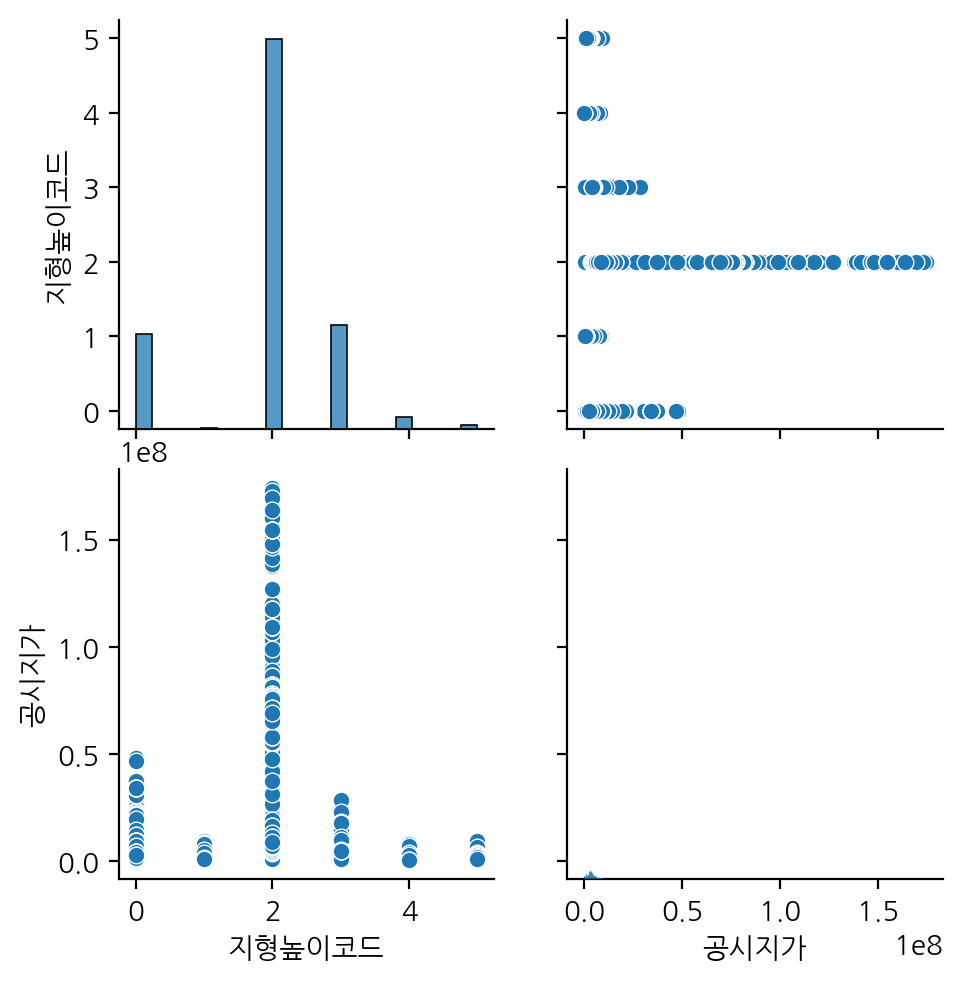

In [31]:
g = sns.PairGrid(temp)
# 여러 개 변수를 하나로 표현
g.map_diag(sns.histplot)
# diag = 대각선
g.map_offdiag(sns.scatterplot)

plt.show()

     구단위  급경사_count
0    강남구        113
1    강동구         15
2    강북구         63
3    강서구        623
4    관악구       2243
5    광진구        126
6    구로구        120
7    금천구        189
8    노원구        728
9    도봉구         73
10  동대문구         37
11   동작구       2097
12   마포구        318
13  서대문구       1917
14   서초구        592
15   성동구         71
16   성북구        114
17   송파구         11
18   양천구         61
19  영등포구         17
20   용산구          5
21   은평구       3741
22   종로구       4989
23    중구         13
24   중랑구        154


<ipython-input-32-ffd7c3bd843e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='구단위', y='급경사_count', data=급경사_count, palette='viridis')


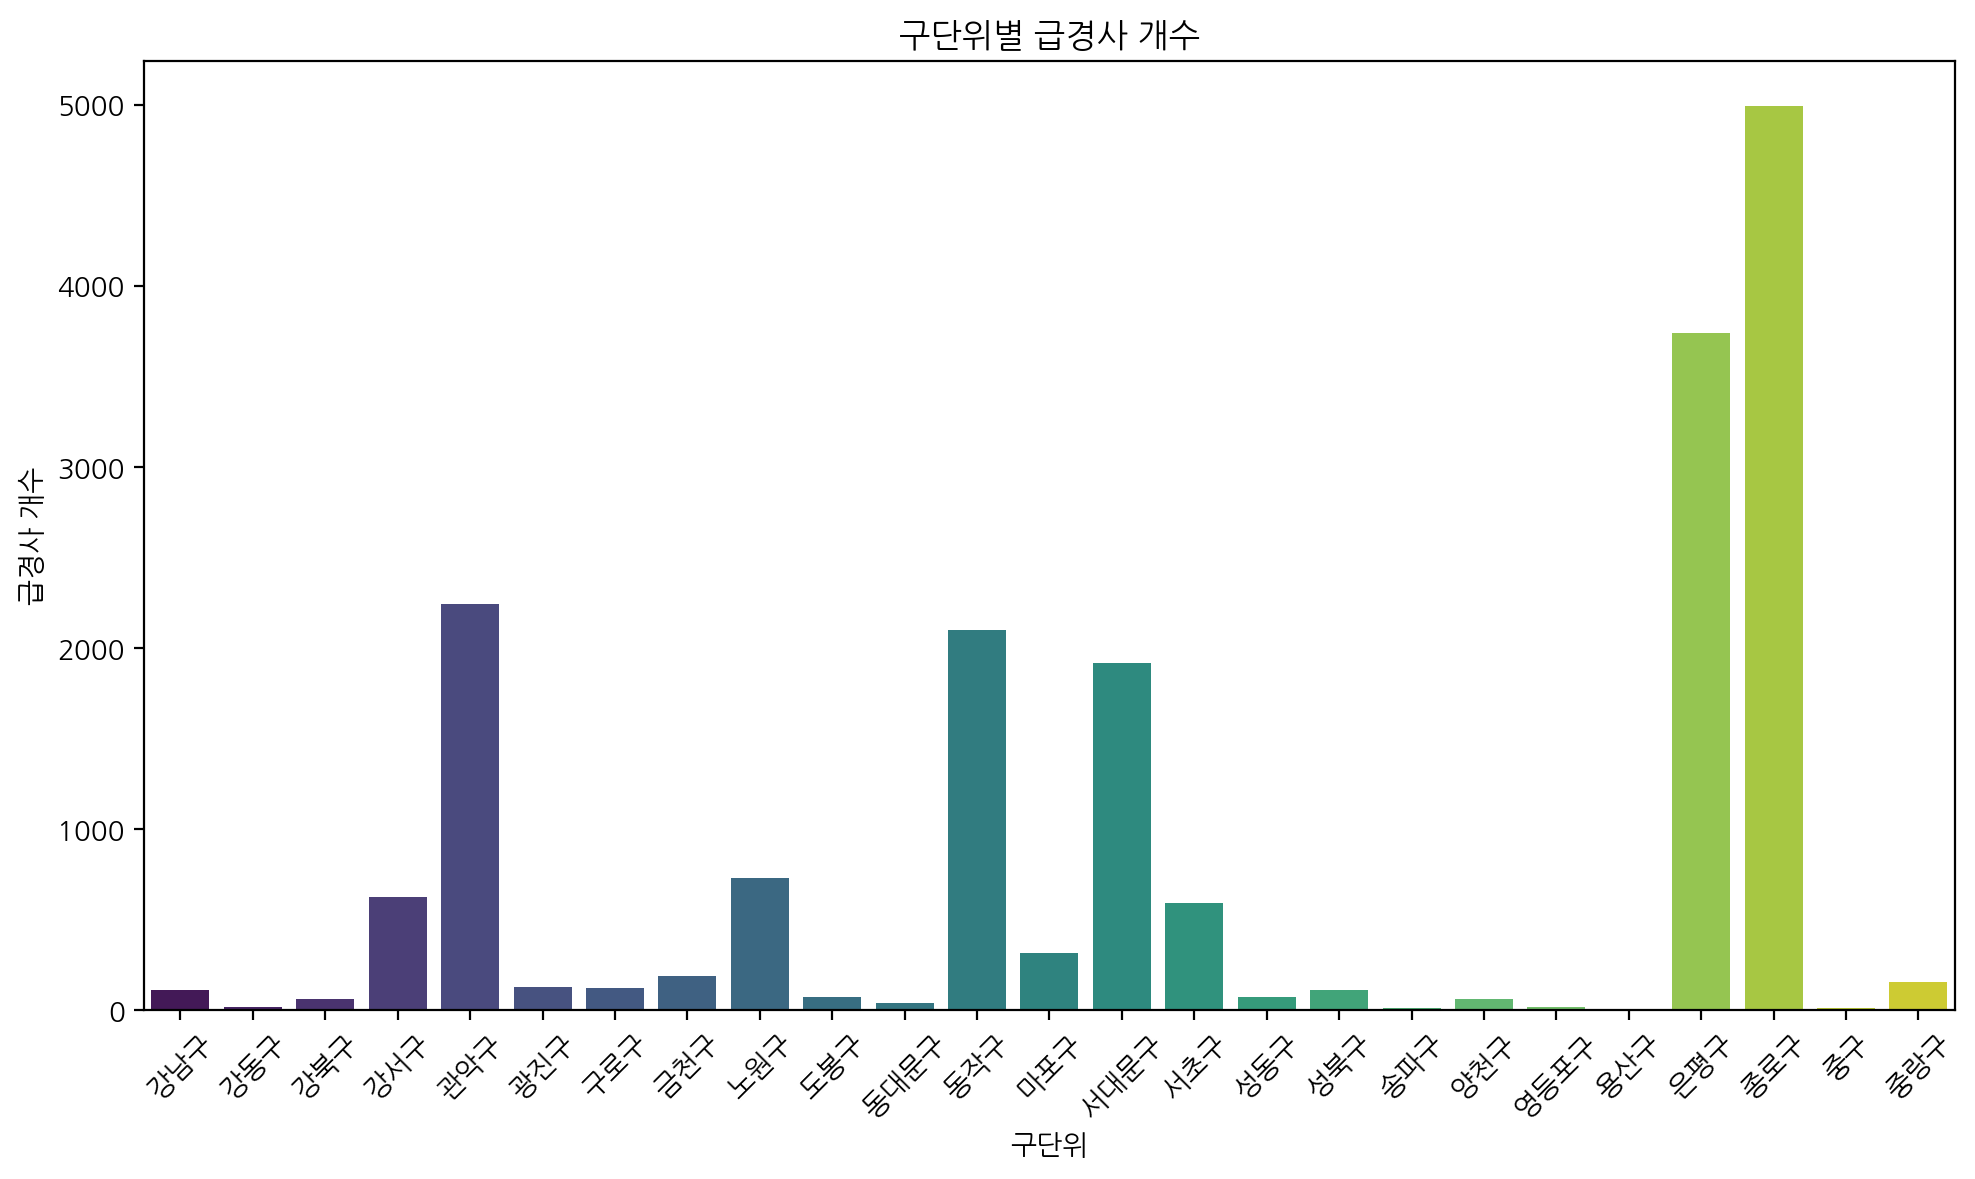

In [32]:
# '지형높이'가 '급경사'인 행만 필터링
df_급경사 = temp[temp['지형높이'] == '급경사']

# 구단위별로 '급경사'의 개수 세기
급경사_count = df_급경사.groupby('구단위').size().reset_index(name='급경사_count')

# 결과 출력
print(급경사_count)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='구단위', y='급경사_count', data=급경사_count, palette='viridis')
plt.title('구단위별 급경사 개수')
plt.xlabel('구단위')
plt.ylabel('급경사 개수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
# temp.to_csv('./data/서울시_경사.csv', index=False)